<a href="https://colab.research.google.com/github/LeTuanCS150901/AI_Introductory/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [214]:
!git init

Initialized empty Git repository in /content/.git/


In [217]:
git remote add https://github.com/LeTuanCS150901

SyntaxError: ignored

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Test

[Errno 2] No such file or directory: '/content/drive/MyDrive/Test'
/content


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


# I. Import data set and libraries needed


In [113]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [114]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X.shape

(60000, 28, 28)

Hiển thị ảnh trong training set

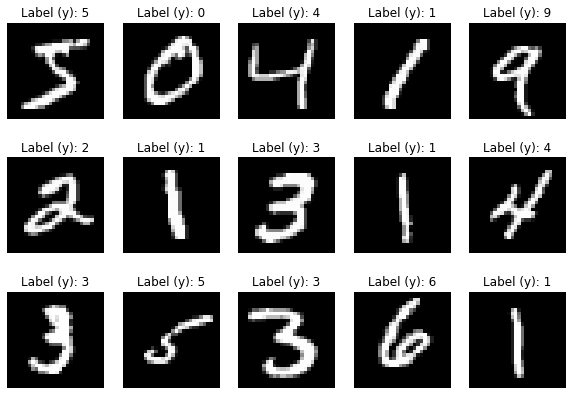

In [115]:
# Plotting
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

Biến đổi ảnh từ không gian 3 chiều thành 2 chiều.
Với rows là số lượng ảnh, columns là từng bức ảnh chiều 28x28

In [116]:
X_train = train_X.reshape(60000, 28*28)
X_test = test_X.reshape(10000, 28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Kiểm tra tập labels training

In [117]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Chuyển tập labels training về dạng one-hot vecto có số chiều (num_examples x num_classes)


In [118]:
def one_hot(y, c):
  """
  y: labels of training set
  c: the number of classes (from 0 to 9)
   
  """
  m = len(y) # number of training examples
  
  y_hot = np.zeros((m, c))  # A zero matrix of size (num_examples, classes)
    
  # Putting 1 for column where the label is,
  # Using multidimensional indexing.
  y_hot[np.arange(len(y)), y] = 1
    
  return y_hot

# II. Learning algorithm 

## Part 1: The gradient of the loss function

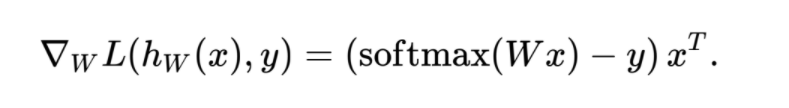

Compute the gradient of a single example given parameters W.

In [148]:
def multinomial_logreg_grad_i(X, W, y_hot):

   z = X @ W # hypothesis function 
   y_predict = softmax(z)
   #print("y_predict grad", y_predict)

   weight_gradient = np.dot(X.T, (y_predict - y_hot) )

   return weight_gradient 

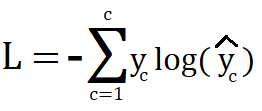

Compute the loss of a single example given parameters W

In [147]:
def multinomial_logreg_loss_i(X, W, y_hot):
    """
    Return the cross-entropy of vectors y labels and softmax.
    param y_hot: one-hot vector encoding correct class 
    returns: vecto cost

    """
    z = X @ W # hypothesis function 
    y_predict = softmax(z) 
    
    return -np.log( y_predict[ np.where(y_hot) ] )

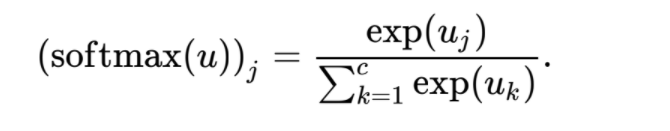

In [146]:
def softmax(z):
  """
  z: hypothesis function X @ W
  """
  exp = np.exp(z - np.max(z))  # Subtracting the max of z for numerical stability.

  for i in range(len(z)):   # Calculating softmax for all examples.
      exp[i] /= np.sum(exp[i])
        
  return exp

## Part 2: Gradient descent

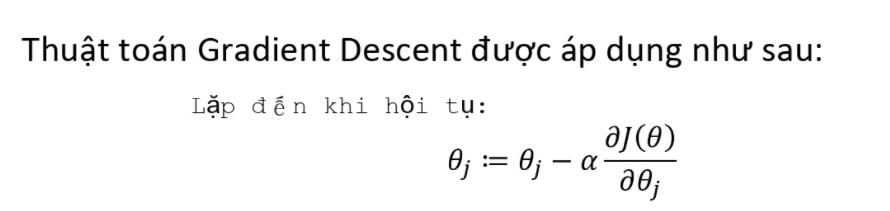

In [157]:
def multinomial_logreg_total_grad(X, W, y_hot, learning_rate, lam_da, iterations):

    J_history = []
    
    for i in range(iterations):
      total_loss = 1/m * sum( multinomial_logreg_loss_i(X, W, y_hot) )
      print("total loss ", i + 1 , total_loss)

      grad =  multinomial_logreg_grad_i(X, W, y_hot)
      #print("gradient ", i, grad )

      W = W - 1/m * learning_rate * (grad + (lam_da/2 * np.linalg.norm(W)) )
      #print("Weight ", i, W)

      if i % 10 == 0:
        J_history.append(total_loss)

    return (W, J_history)
      

In [158]:
W_optimal, J_history = multinomial_logreg_total_grad(X, W, y_hot, learning_rate, lam_da, iterations)

total loss  1 2.3025850929954172
total loss  2 1.5081517762269407
total loss  3 1.387588250598809
total loss  4 1.5788610352243049
total loss  5 1.7068615262517555
total loss  6 1.1937221169751224
total loss  7 1.3950927196670035
total loss  8 1.2902213876484692
total loss  9 0.8918986803106821
total loss  10 0.9345201065204366
total loss  11 1.1079687129972364
total loss  12 0.9064703225255646
total loss  13 0.7855300614078387
total loss  14 0.6862990392790775
total loss  15 0.6656184430633579
total loss  16 0.685312286374548
total loss  17 0.6233974254220086
total loss  18 0.5922536442363202
total loss  19 0.6035769453036075
total loss  20 0.6140151164113565
total loss  21 0.6125729716451912
total loss  22 0.6444846472949143
total loss  23 0.5824612573783337
total loss  24 0.5905551689314583
total loss  25 0.5424875557338854
total loss  26 0.539017710607912
total loss  27 0.5068556523750082
total loss  28 0.4982504370415059
total loss  29 0.4766833073754563
total loss  30 0.466956843

## Part 3: Computing more efficiently

## Part 4: Evaluating gradient descent

# IV. Training Model

Chuẩn hóa đầu vào bằng cách chia cho 255 mỗi điểm dữ liệu để đưa về dạng phân bố chuẩn Gauss 0-1

In [123]:
X_train = X_train / 255
X_train.shape
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [124]:
m = len(train_y)
print("m", m)
print("X ban dau", X_train.shape)

X = np.hstack( (np.ones((m,1)), X_train) )
print("X sau khi noi vecto", X.shape)

n = np.size(X, 1)
print("n", n)
W = np.zeros((n, 10))
print("theta", W.shape)

m 60000
X ban dau (60000, 784)
X sau khi noi vecto (60000, 785)
n 785
theta (785, 10)


In [125]:
y_hot = one_hot(train_y, c)
y_hot.shape

(60000, 10)

In [126]:
print(X.shape)
print(W.shape)
print(y_hot.shape)

(60000, 785)
(785, 10)
(60000, 10)


In [155]:
c = 10 # the number of classes from 0 to 9
iterations = 1000 # the number of loops
learning_rate = 1.0
lam_da = 0.0001

In [156]:
initial_cost = multinomial_logreg_loss_i(X, W, y_hot)
initial_cost

array([2.30258509, 2.30258509, 2.30258509, ..., 2.30258509, 2.30258509,
       2.30258509])

In [163]:
def predict(X, W):
    
    # X --> Input.
    # w --> weights.
  
    # Predicting
    z = X @ W
    y_predict = softmax(z)
    
    # Returning the class with highest probability.
    return np.argmax(y_predict, axis=1)

In [167]:
train_predict = predict(X, W_optimal)
print(train_predict)
print(train_y)

[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]


In [174]:
# Flattening and normalizing.
X_test = test_X.reshape(10000,28*28)
X_test = X_test/255
m = X_test.shape[0]
X_test = np.hstack( (np.ones((m, 1)), X_test) )
X_test.shape

(10000, 785)

In [199]:
test_predict = predict(X_test, W_optimal)
test_predict.shape

(10000,)

In [ ]:
plt.plot(x = )

In [209]:
len(J_history)

100

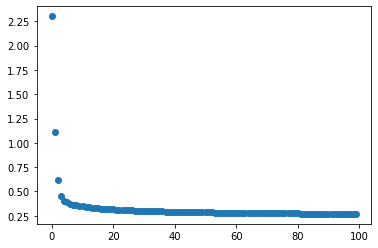

In [213]:
plt.scatter(x = x_range, y = J_history)


In [211]:
x_range = [i for i in range(100)]
len(x_range)

100

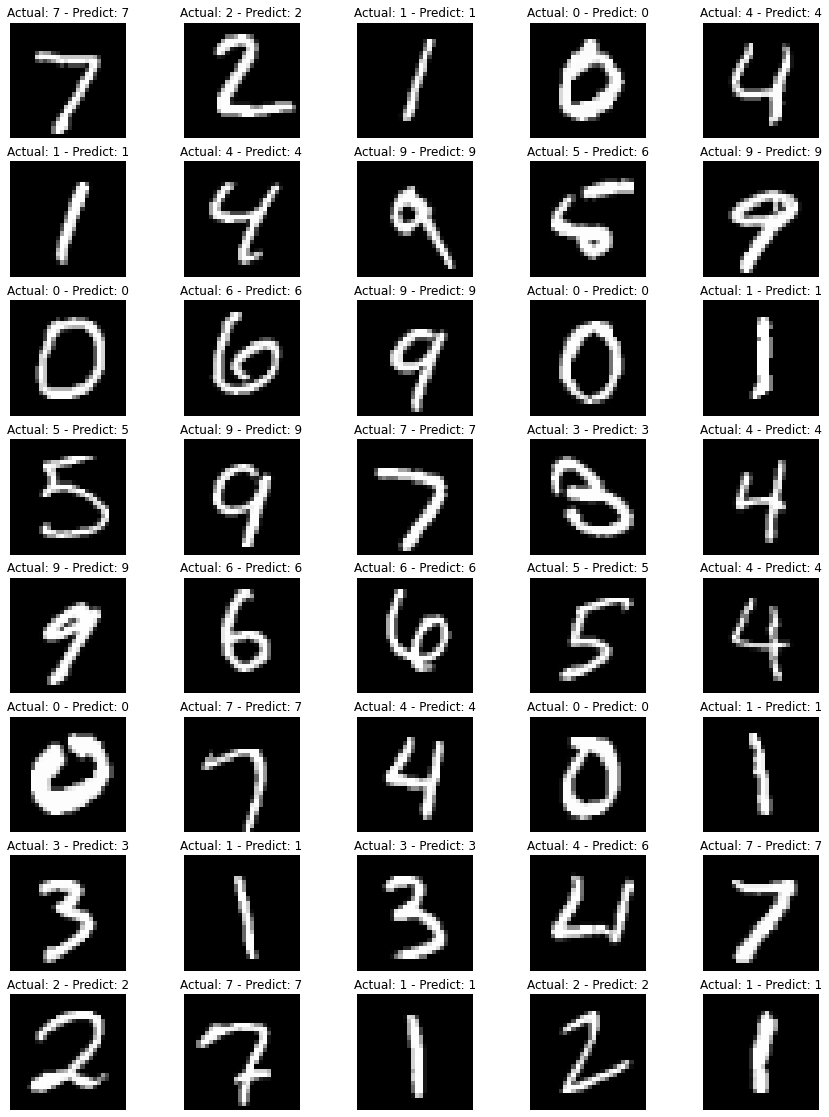

In [206]:
fig = plt.figure(figsize=(15, 20))

for i in range(40):  
    ax = fig.add_subplot(8, 5, i+1)
    ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title('Actual: {actual} - Predict: {predict}'.format(actual=test_y[i], predict = test_predict[i]))
    plt.axis('off')
